In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Import module from folder in another directory
import importlib.util
spec = importlib.util.spec_from_file_location("outliers", "data_preprocessing/outliers.py")
outliers = importlib.util.module_from_spec(spec)
spec.loader.exec_module(outliers)

import sys
sys.path.append('data_preprocessing')
import data_preprocessing.summary as summary
import data_preprocessing.normalize as normalize

import warnings
warnings.filterwarnings("ignore")

from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

%matplotlib inline

rng = np.random.RandomState(31337)

In [4]:
train_data = pd.read_csv('../data/input/ames_train.csv')
test_data = pd.read_csv('../data/input/ames_test.csv')

In [5]:
'''train_data.set_index('Id', inplace=True)
train_data.drop(['PID'], axis=1, inplace=True)

test_data.set_index('Id', inplace=True)
test_data.drop(['PID'], axis=1, inplace=True)'''

"train_data.set_index('Id', inplace=True)\ntrain_data.drop(['PID'], axis=1, inplace=True)\n\ntest_data.set_index('Id', inplace=True)\ntest_data.drop(['PID'], axis=1, inplace=True)"

In [6]:
train_data = normalize.fill_in_missing_values(train_data)
train_data = outliers.remove_outliers(train_data)
#train_data = normalize.normalize(train_data)

test_data = normalize.fill_in_missing_values(test_data)
test_data = outliers.remove_outliers(test_data)

In [7]:
train_data = train_data.select_dtypes(include=[np.number])
test_data = test_data.select_dtypes(include=[np.number])

X_train, X_test, y_train, y_test = train_test_split(train_data.loc[:, train_data.columns != 'SalePrice'], 
                                                  train_data['SalePrice'],
                                                  test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [8]:
clf = RandomForestRegressor(n_estimators=500)

clf.fit(X_train,y_train)
yPred = clf.predict(X_test)

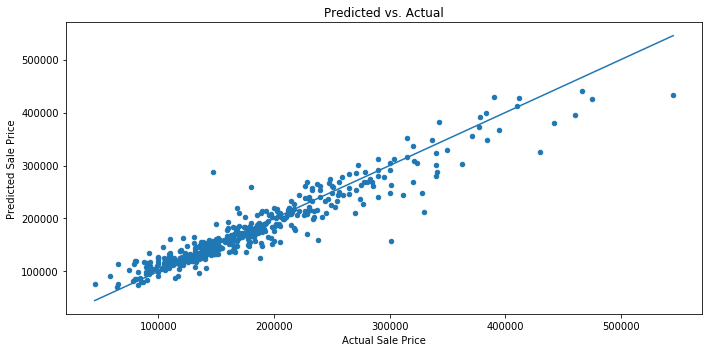

In [9]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, yPred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()

In [10]:
r2_score(y_test,yPred)

0.89794225002153893

In [11]:

kf = KFold(n_splits=2,shuffle=True,random_state=rng)
for train_index,test_index in kf.split(X_train):
    clf = xgb.XGBRegressor().fit(X_train[train_index],y_train[train_index])
    y_pred = clf.predict(X_train[test_index])
    actual = y_train[test_index]
    print(r2_score(actual, y_pred))

0.903883040188
0.902691532109


In [12]:
clf = xgb.XGBRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

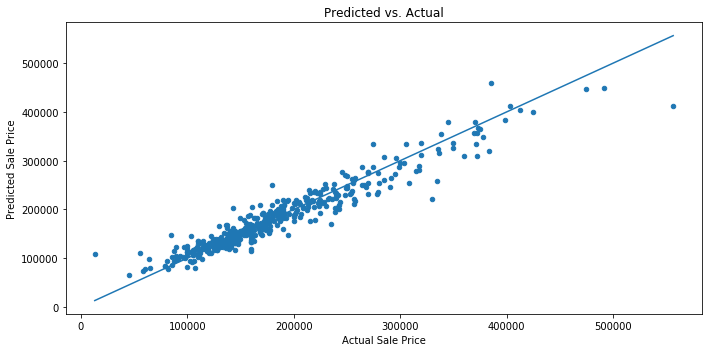

In [13]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()

In [14]:
r2_score(y_test,y_pred)

0.91680122863068225

GridSearchCV With xgboost parameter optimisation

In [15]:
xgb_clf = xgb.XGBRegressor()
gridSearchClf = GridSearchCV(xgb_clf, {'max_depth': [2,4,6],
                    'n_estimators': [50,100,200]}, verbose=1)
gridSearchClf.fit(X_train,y_train)
y_pred = gridSearchClf.predict(X_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    6.1s finished


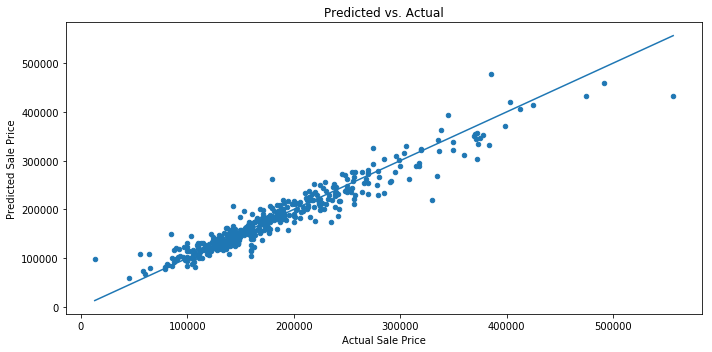

In [16]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()

In [17]:
r2_score(y_test,y_pred)

0.91989255340388831

In [18]:
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

In [19]:
regr_1.fit(X_train,y_train)
y_pred = regr_1.predict(X_test)

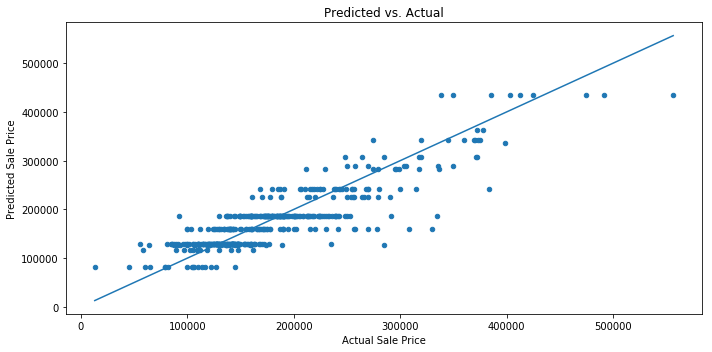

In [20]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()

In [21]:
r2_score(y_test,y_pred)

0.75629342277645661

In [22]:
regr_2.fit(X_train,y_train)
y_pred = regr_2.predict(X_test)

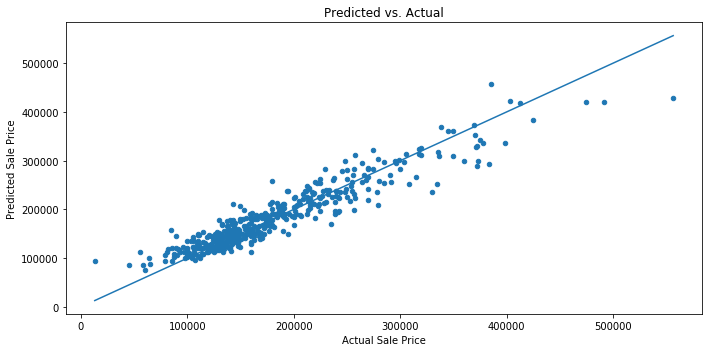

In [23]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()

In [24]:
r2_score(y_test,y_pred)

0.88134544018219096